<a href="https://colab.research.google.com/github/samanehPahlavani/MscFraudDetection/blob/main/LastEtereumLSTMDeep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect Google Drive For Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Libraries











In [2]:
####Libraries Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

%matplotlib inline
import sklearn

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold

In [4]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVR

In [6]:
from sklearn import metrics # for checking the model accuracy

In [7]:
from sklearn.model_selection import cross_val_score

In [8]:
!pip install pandas_ml

In [9]:
# Import the necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score
from sklearn.model_selection import train_test_split, KFold

In [11]:
import time

# Functions Def

In [12]:
def LoadData(data):
  warnings.filterwarnings('ignore')
  pd.options.display.max_columns = None
  pd.options.display.max_rows = None
  df = pd.read_csv(os.path.join("/content/drive/MyDrive/EtherFirstDataSet/", data+".csv"))
  return df
#Load datas
def preprocessing():

  df1 = LoadData(str(1))
  df2 = LoadData(str(2))

  df1_fillna = df1.copy()
  df2_fillna = df2.copy()

  #Drop Most None Related Value Features
  df1_fillna.drop(["ERC20_uniq_rec_token_name","ERC20_uniq_sent_token_name","ERC20_avg_val_sent","ERC20_max_val_sent","ERC20_min_val_sent","ERC20_avg_val_rec","ERC20_max_val_rec","ERC20_min_val_rec","ERC20_uniq_rec_contract_addr","ERC20_uniq_sent_addr_1","ERC20_uniq_sent_addr","ERC20_total_Ether_sent_contract","ERC20_total_ether_sent","ERC20_total_Ether_received","ERC20_most_rec_token_type","ERC20_most_sent_token_type"], axis=1, inplace=True)
  df1_fillna.drop(["ERC20_uniq_rec_addr","Total_ERC20_tnxs","Time_Diff_between_first_and_last_Mins","total_ether_sent_contracts"], axis=1, inplace=True)
  df2_fillna.drop(["minTimeBetweenSentTnx","maxTimeBetweenSentTnx","minTimeBetweenRecTnx","maxTimeBetweenRecTnx","lifetime","activityDays","dailyMax","ratioRecSent","ratioSentTotal","ratioRecTotal","giniSent","giniRec","txFreq","stdBalanceEth"], axis=1, inplace=True)

  #Rename Columns
  selected_columns = ["address","flag","avgTimeBetweenRecTnx","avgTimeBetweenSentTnx","sentTransactions" ,"receivedTransactions", "createdContracts" ,"Average_of_numUniqRecAddress" ,"Average_of_numUniqSentAddress"
  ,"minValReceived"
  ,"maxValReceived"
  ,"avgValReceived"
  , "minValSent"
  , "maxValSent"
  ,"avgValSent"
  ,"totalTransactions"
  ,"totalEtherSent"
  ,"totalEtherReceived"
  ,"totalEtherBalance"    ]

  df2_fillna = df2[selected_columns].copy()

  df2_fillna.columns = ["Address"
  ,"FLAG"
  ,"Avg_min_between_received_tnx"
  ,"Avg_min_between_sent_tnx"
  ,"Sent_tnx"
  ,"Received_Tnx"
  ,"Number_of_Created_Contracts"
  ,"Average_of_Unique_Received_From_Addresses"
  ,"Average_of_Unique_Sent_To_Addresses"
  ,"min_value_received"
  ,"max_value_received "
  ,"avg_val_received"
  ,"min_val_sent"
  ,"max_val_sent"
  ,"avg_val_sent"
  ,"total_transactions_including_tnx_to_create_contract"
  ,"total_Ether_sent"
  ,"total_ether_received"
  ,"total_ether_balance"
  ]

  merged_df = pd.merge(df1_fillna, df2_fillna, how='outer')
  df_filtered = merged_df.drop_duplicates(subset='Address', keep='first')
  return df_filtered



In [13]:
def scaled(data):
  # Convert categorical 'FLAG' to numeric
  label_encoder = LabelEncoder()
  data['FLAG'] = label_encoder.fit_transform(data['FLAG'])

  # Splitting the data into features (X) and labels (y)
  X =  data.drop(['FLAG'], axis=1)
  y = data['FLAG']

  # Standardize features
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)
  #X_scaled['FLAG'] = y


  return X_scaled,y

In [14]:
def undersampling(data, target_column):
    # Separate features and target variable
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Apply undersampling
    undersampler = RandomUnderSampler()
    X_resampled, y_resampled = undersampler.fit_resample(X, y)

    # Get indices of selected samples
    selected_indices = undersampler.sample_indices_

    # Get indices of unselected samples
    unselected_indices = np.setdiff1d(np.arange(len(X)), selected_indices)

    # Extract unselected samples
    X_unselected = X.iloc[unselected_indices]
    y_unselected = y.iloc[unselected_indices]

    # Combine unselected data into a DataFrame
    unselected_data = pd.concat([X_unselected, y_unselected], axis=1)
    resampled = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled, unselected_data

In [15]:
def oversampling(data, target_column):
    # Separate features and target variable
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Apply oversampling
    oversampler = RandomOverSampler()
    X_resampled, y_resampled = oversampler.fit_resample(X, y)

    # Get indices of selected samples
    selected_indices = oversampler.sample_indices_

    # Get indices of unselected samples
    unselected_indices = np.setdiff1d(np.arange(len(X)), selected_indices)

    # Extract unselected samples
    X_unselected = X.iloc[unselected_indices]
    y_unselected = y.iloc[unselected_indices]

    # Combine unselected data into a DataFrame
    unselected_data = pd.concat([X_unselected, y_unselected], axis=1)
    resampled = pd.concat([X_resampled, y_resampled], axis=1)

    return resampled, unselected_data

In [16]:
def smote(data, target_column):
    # Separate features and target variable
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Apply SMOTE
    smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Combine resampled data into a DataFrame
    resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name=target_column)], axis=1)
    return resampled_data,''

In [17]:
def ballanced(data,type="O"):

  if type=="U":
    resampled, unselected_data = undersampling(data, 'FLAG')
  elif type=="S":
    resampled, unselected_data  = smote(data, 'FLAG')
  elif type=="O":
    resampled, unselected_data = oversampling(data, 'FLAG')


  return resampled, unselected_data


#**Preprocessing **

In [18]:
df_filtered = preprocessing()
df_filtered = df_filtered.drop(['Address'], axis=1)

**Imballanced Dataset**

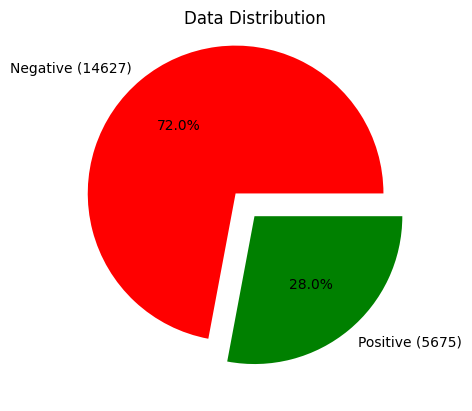

In [19]:
df = df_filtered
positive_sample = df[(df["FLAG"]==1)]
negative_sample = df[(df["FLAG"]==0)]
dist = df["FLAG"].value_counts()

_ = plt.pie(dist, labels = ["Negative ({0})".format(len(negative_sample)), "Positive ({0})".format(len(positive_sample))], colors = ["r", "g"], explode=[0.2, 0], autopct='%1.1f%%')
_ = plt.title("Data Distribution")

In [20]:
#df_filtered = np.array(df_filtered)
df_filtered.shape

(20302, 18)

In [21]:
resampledOver, unselected_Over = ballanced(df_filtered,"O")
resampledOver.shape

(29254, 18)

In [22]:
X_reshapedO,y_reshapedO = scaled(resampledOver)
X_reshapedO.shape

(29254, 17)

In [23]:
X_trainO, X_testO, y_trainO, y_testO =  train_test_split(X_reshapedO, y_reshapedO, test_size=0.1, random_state=42)

# #**Models**

LSTM

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import LSTM
from sklearn.metrics import roc_auc_score

In [25]:
from keras.optimizers import Adam

In [26]:
X = np.concatenate([X_trainO, X_testO], axis=0)
y = np.concatenate([y_trainO, y_testO], axis=0)
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

In [27]:

# Reshape X to 3D for CNN input
X_reshaped = X.reshape(X.shape[0],X.shape[1], 1)


In [28]:
kf = KFold(n_splits=10, random_state = 42, shuffle=True)
fld = 1

In [29]:
optimizer = Adam(learning_rate=0.0001)

In [36]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(46, activation='relu', input_shape=(X_reshaped.shape[1], 1), return_sequences=True))
model.add(LSTM(30, activation='relu', return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

In [33]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, roc_auc_score

In [34]:
accuracies = []
history = []
losses = []
val_accuracies = []
val_losses = []
resultLSTM  = {}

for train_index, test_index in kf.split(X):
        X_trainV, X_testV = X_df.iloc[train_index], X_df.iloc[test_index]
        y_trainV, y_testV = y_df.iloc[train_index], y_df.iloc[test_index]

        start_time = time.time()
        model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

        Training_time = time.time() - start_time

        start_time = time.time()
        #history = model.fit(X_trainV, y_trainV, epochs=100, batch_size=32, validation_split=0.2)
        history = model.fit(X_trainV, y_trainV, validation_data=(X_testV, y_testV), epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping])

        Inference_Time = time.time() - start_time

        accuracies.append(history.history['accuracy'][-1])
        losses.append(history.history['loss'][-1])
        val_accuracies.append(history.history['val_accuracy'][-1])
        val_losses.append(history.history['val_loss'][-1])

        y_predictLSTM = model.predict(X_testV)

        y_predictLSTM_binary = np.where(y_predictLSTM > 0.5, 1, 0)

        # Now use these binary predictions for calculating metrics
        accuracy = accuracy_score(y_testV, y_predictLSTM_binary)
        precision = precision_score(y_testV, y_predictLSTM_binary)
        recall = recall_score(y_testV, y_predictLSTM_binary)
        f1 = f1_score(y_testV, y_predictLSTM_binary)
        kappa = cohen_kappa_score(y_testV, y_predictLSTM_binary)
        conf_mat = confusion_matrix(y_testV, y_predictLSTM_binary)
        roc_auc = roc_auc_score(y_testV, y_predictLSTM_binary)
        fpr, tpr, thresholds = roc_curve(y_testV, y_predictLSTM_binary)



        resultLSTM[f'Model_{fld}'] = {'Matrix': conf_mat, 'accuracy': accuracy, 'precision': precision,
                                  'recall': recall, 'f1': f1, 'kappa': kappa, 'roc_auc': roc_auc,'fpr':fpr
                                     ,'tpr':tpr,'thresholds':thresholds,'Inference_Time':Inference_Time,'Training_time':Training_time}


        # Print metrics for the LR model
        print(f'Metrics for LR Model Fold {fld}:')
        print(f"Inference Time: {Inference_Time:.4f} seconds")
        print(f"training Time: {Training_time:.4f} seconds")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1-score: {f1:.2f}")
        print(f"kappa: {kappa:.2f}")
        print(f"ROC AUC: {roc_auc:.2f}")
        print(f"fpr: {fpr}")
        print(f"tpr: {tpr}")
        print(f"thresholds: {thresholds}")
        print(conf_mat)
        print("********************************************************************")

        fld = fld + 1

Epoch 1/100
823/823 [==============================] - 22s 19ms/step - loss: 0.3666 - accuracy: 0.8222 - val_loss: 0.3743 - val_accuracy: 0.8216
Epoch 2/100
823/823 [==============================] - 16s 19ms/step - loss: 0.3672 - accuracy: 0.8203 - val_loss: 0.3787 - val_accuracy: 0.8230
Epoch 3/100
823/823 [==============================] - 16s 19ms/step - loss: 0.3672 - accuracy: 0.8210 - val_loss: 0.4414 - val_accuracy: 0.7779
Epoch 4/100
823/823 [==============================] - 16s 19ms/step - loss: 0.3676 - accuracy: 0.8218 - val_loss: 0.4063 - val_accuracy: 0.8206
Epoch 5/100
823/823 [==============================] - 17s 21ms/step - loss: 0.3615 - accuracy: 0.8253 - val_loss: 0.3882 - val_accuracy: 0.8124
Epoch 6/100
823/823 [==============================] - 16s 19ms/step - loss: 0.3611 - accuracy: 0.8257 - val_loss: 0.3671 - val_accuracy: 0.8278
Epoch 7/100
823/823 [==============================] - 16s 19ms/step - loss: 0.3602 - accuracy: 0.8268 - val_loss: 0.3822 - val_ac

In [35]:
# Initialize lists to store metric values
accuracies = []
precisions = []
recalls = []
f1_scores = []
kappas = []
Inference_Time = []
Training_time = []
roc_auc = []
# Loop over the results dictionary
for model, metrics in resultLSTM.items():
    accuracies.append(metrics['accuracy'])
    precisions.append(metrics['precision'])
    recalls.append(metrics['recall'])
    f1_scores.append(metrics['f1'])
    kappas.append(metrics['kappa'])
    Inference_Time.append(metrics['Inference_Time'])
    Training_time.append(metrics['Training_time'])
    roc_auc.append(metrics['roc_auc'])

# Calculate the best, worst, and average values for each metric
best_accuracy = round(max(accuracies), 2)
worst_accuracy = round(min(accuracies), 2)
average_accuracy = round(sum(accuracies) / len(accuracies), 2)


best_precision = round(max(precisions), 2)
worst_precision = round(min(precisions), 2)
average_precision = round(sum(precisions) / len(precisions), 3)

best_recall = round(max(recalls), 2)
worst_recall = round(min(recalls), 2)
average_recall = round(sum(recalls) / len(recalls), 2)

best_f1_score = round(max(f1_scores), 2)
worst_f1_score = round(min(f1_scores), 2)
average_f1_score = round(sum(f1_scores) / len(f1_scores), 2)

best_kappa = round(max(kappas), 2)
worst_kappa = round(min(kappas), 2)
average_kappa = round(sum(kappas) / len(kappas), 2)

best_Inference_Time = round(max(Inference_Time), 5)
worst_Inference_Time = round(min(Inference_Time), 5)
average_Inference_Time = round(sum(Inference_Time) / len(Inference_Time), 5)


best_Training_time = round(max(Training_time), 5)
worst_Training_time = round(min(Training_time), 5)
average_Training_time = round(sum(Training_time) / len(Training_time), 5)

best_roc_auc = round(max(roc_auc), 2)
worst_roc_auc = round(min(roc_auc), 2)
average_roc_auc = round(sum(roc_auc) / len(roc_auc), 2)

# Print the results
print("Best Accuracy:", best_accuracy)
print("Worst Accuracy:", worst_accuracy)
print("Average Accuracy:", average_accuracy)

print("************************************************")


print("Best Precision:", best_precision)
print("Worst Precision:", worst_precision)
print("Average Precision:", average_precision)
print("************************************************")

print("Best Recall:", best_recall)
print("Worst Recall:", worst_recall)
print("Average Recall:", average_recall)
print("************************************************")

print("Best F1 Score:", best_f1_score)
print("Worst F1 Score:", worst_f1_score)
print("Average F1 Score:", average_f1_score)
print("************************************************")

print("Best Kappa:", best_kappa)
print("Worst Kappa:", worst_kappa)
print("Average Kappa:", average_kappa)

print("************************************************")

print("Best Inference_Time:", best_Inference_Time)
print("Worst Inference_Time:", worst_Inference_Time)
print("Average Inference_Time:", average_Inference_Time)
print("************************************************")

print("Best Training_time:", best_Training_time)
print("Worst Training_time:", worst_Training_time)
print("Average Training_time:", average_Training_time)
print("************************************************")

print("Best roc_auc:", best_roc_auc)
print("Worst roc_auc:", worst_roc_auc)
print("Average roc_auc:", average_roc_auc)


Best Accuracy: 0.86
Worst Accuracy: 0.83
Average Accuracy: 0.85
************************************************
Best Precision: 0.83
Worst Precision: 0.78
Average Precision: 0.807
************************************************
Best Recall: 0.92
Worst Recall: 0.9
Average Recall: 0.92
************************************************
Best F1 Score: 0.87
Worst F1 Score: 0.84
Average F1 Score: 0.86
************************************************
Best Kappa: 0.72
Worst Kappa: 0.65
Average Kappa: 0.7
************************************************
Best Inference_Time: 458.26352
Worst Inference_Time: 212.39472
Average Inference_Time: 289.52961
************************************************
Best Training_time: 0.01188
Worst Training_time: 0.0071
Average Training_time: 0.00904
************************************************
Best roc_auc: 0.86
Worst roc_auc: 0.83
Average roc_auc: 0.85


In [43]:
X = np.concatenate([X_trainO, X_testO], axis=0)
y = np.concatenate([y_trainO, y_testO], axis=0)
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

In [44]:

# Reshape X to 3D for CNN input
X_reshaped = X.reshape(X.shape[0],X.shape[1], 1)


In [45]:
kf = KFold(n_splits=10, random_state = 42, shuffle=True)
fld = 1

In [46]:
optimizer = Adam(learning_rate=0.00001)

In [47]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(46, activation='relu', input_shape=(X_reshaped.shape[1], 1), return_sequences=True))
model.add(LSTM(30, activation='relu', return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

In [48]:
accuracies = []
history = []
losses = []
val_accuracies = []
val_losses = []
resultLSTM  = {}

for train_index, test_index in kf.split(X):
        X_trainV, X_testV = X_df.iloc[train_index], X_df.iloc[test_index]
        y_trainV, y_testV = y_df.iloc[train_index], y_df.iloc[test_index]

        start_time = time.time()
        model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

        Training_time = time.time() - start_time

        start_time = time.time()
        #history = model.fit(X_trainV, y_trainV, epochs=100, batch_size=32, validation_split=0.2)
        history = model.fit(X_trainV, y_trainV, validation_data=(X_testV, y_testV), epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping])

        Inference_Time = time.time() - start_time

        accuracies.append(history.history['accuracy'][-1])
        losses.append(history.history['loss'][-1])
        val_accuracies.append(history.history['val_accuracy'][-1])
        val_losses.append(history.history['val_loss'][-1])

        y_predictLSTM = model.predict(X_testV)

        y_predictLSTM_binary = np.where(y_predictLSTM > 0.5, 1, 0)

        # Now use these binary predictions for calculating metrics
        accuracy = accuracy_score(y_testV, y_predictLSTM_binary)
        precision = precision_score(y_testV, y_predictLSTM_binary)
        recall = recall_score(y_testV, y_predictLSTM_binary)
        f1 = f1_score(y_testV, y_predictLSTM_binary)
        kappa = cohen_kappa_score(y_testV, y_predictLSTM_binary)
        conf_mat = confusion_matrix(y_testV, y_predictLSTM_binary)
        roc_auc = roc_auc_score(y_testV, y_predictLSTM_binary)
        fpr, tpr, thresholds = roc_curve(y_testV, y_predictLSTM_binary)



        resultLSTM[f'Model_{fld}'] = {'Matrix': conf_mat, 'accuracy': accuracy, 'precision': precision,
                                  'recall': recall, 'f1': f1, 'kappa': kappa, 'roc_auc': roc_auc,'fpr':fpr
                                     ,'tpr':tpr,'thresholds':thresholds,'Inference_Time':Inference_Time,'Training_time':Training_time}


        # Print metrics for the LR model
        print(f'Metrics for LR Model Fold {fld}:')
        print(f"Inference Time: {Inference_Time:.4f} seconds")
        print(f"training Time: {Training_time:.4f} seconds")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1-score: {f1:.2f}")
        print(f"kappa: {kappa:.2f}")
        print(f"ROC AUC: {roc_auc:.2f}")
        print(f"fpr: {fpr}")
        print(f"tpr: {tpr}")
        print(f"thresholds: {thresholds}")
        print(conf_mat)
        print("********************************************************************")

        fld = fld + 1

Epoch 1/100
823/823 [==============================] - 20s 20ms/step - loss: 0.6553 - accuracy: 0.5912 - val_loss: 0.6425 - val_accuracy: 0.6186
Epoch 2/100
823/823 [==============================] - 16s 19ms/step - loss: 0.6323 - accuracy: 0.6248 - val_loss: 0.6268 - val_accuracy: 0.6326
Epoch 3/100
823/823 [==============================] - 17s 21ms/step - loss: 0.6186 - accuracy: 0.6355 - val_loss: 0.6146 - val_accuracy: 0.6449
Epoch 4/100
823/823 [==============================] - 16s 19ms/step - loss: 0.6044 - accuracy: 0.6528 - val_loss: 0.6000 - val_accuracy: 0.6541
Epoch 5/100
823/823 [==============================] - 16s 19ms/step - loss: 0.5843 - accuracy: 0.6752 - val_loss: 0.5649 - val_accuracy: 0.7044
Epoch 6/100
823/823 [==============================] - 16s 19ms/step - loss: 0.5646 - accuracy: 0.6869 - val_loss: 0.5505 - val_accuracy: 0.7088
Epoch 7/100
823/823 [==============================] - 16s 19ms/step - loss: 0.5431 - accuracy: 0.7048 - val_loss: 0.5299 - val_ac

In [49]:
# Initialize lists to store metric values
accuracies = []
precisions = []
recalls = []
f1_scores = []
kappas = []
Inference_Time = []
Training_time = []
roc_auc = []
# Loop over the results dictionary
for model, metrics in resultLSTM.items():
    accuracies.append(metrics['accuracy'])
    precisions.append(metrics['precision'])
    recalls.append(metrics['recall'])
    f1_scores.append(metrics['f1'])
    kappas.append(metrics['kappa'])
    Inference_Time.append(metrics['Inference_Time'])
    Training_time.append(metrics['Training_time'])
    roc_auc.append(metrics['roc_auc'])

# Calculate the best, worst, and average values for each metric
best_accuracy = round(max(accuracies), 2)
worst_accuracy = round(min(accuracies), 2)
average_accuracy = round(sum(accuracies) / len(accuracies), 2)


best_precision = round(max(precisions), 2)
worst_precision = round(min(precisions), 2)
average_precision = round(sum(precisions) / len(precisions), 3)

best_recall = round(max(recalls), 2)
worst_recall = round(min(recalls), 2)
average_recall = round(sum(recalls) / len(recalls), 2)

best_f1_score = round(max(f1_scores), 2)
worst_f1_score = round(min(f1_scores), 2)
average_f1_score = round(sum(f1_scores) / len(f1_scores), 2)

best_kappa = round(max(kappas), 2)
worst_kappa = round(min(kappas), 2)
average_kappa = round(sum(kappas) / len(kappas), 2)

best_Inference_Time = round(max(Inference_Time), 5)
worst_Inference_Time = round(min(Inference_Time), 5)
average_Inference_Time = round(sum(Inference_Time) / len(Inference_Time), 5)


best_Training_time = round(max(Training_time), 5)
worst_Training_time = round(min(Training_time), 5)
average_Training_time = round(sum(Training_time) / len(Training_time), 5)

best_roc_auc = round(max(roc_auc), 2)
worst_roc_auc = round(min(roc_auc), 2)
average_roc_auc = round(sum(roc_auc) / len(roc_auc), 2)

# Print the results
print("Best Accuracy:", best_accuracy)
print("Worst Accuracy:", worst_accuracy)
print("Average Accuracy:", average_accuracy)

print("************************************************")


print("Best Precision:", best_precision)
print("Worst Precision:", worst_precision)
print("Average Precision:", average_precision)
print("************************************************")

print("Best Recall:", best_recall)
print("Worst Recall:", worst_recall)
print("Average Recall:", average_recall)
print("************************************************")

print("Best F1 Score:", best_f1_score)
print("Worst F1 Score:", worst_f1_score)
print("Average F1 Score:", average_f1_score)
print("************************************************")

print("Best Kappa:", best_kappa)
print("Worst Kappa:", worst_kappa)
print("Average Kappa:", average_kappa)

print("************************************************")

print("Best Inference_Time:", best_Inference_Time)
print("Worst Inference_Time:", worst_Inference_Time)
print("Average Inference_Time:", average_Inference_Time)
print("************************************************")

print("Best Training_time:", best_Training_time)
print("Worst Training_time:", worst_Training_time)
print("Average Training_time:", average_Training_time)
print("************************************************")

print("Best roc_auc:", best_roc_auc)
print("Worst roc_auc:", worst_roc_auc)
print("Average roc_auc:", average_roc_auc)


Best Accuracy: 0.86
Worst Accuracy: 0.84
Average Accuracy: 0.85
************************************************
Best Precision: 0.83
Worst Precision: 0.8
Average Precision: 0.814
************************************************
Best Recall: 0.93
Worst Recall: 0.89
Average Recall: 0.91
************************************************
Best F1 Score: 0.87
Worst F1 Score: 0.85
Average F1 Score: 0.86
************************************************
Best Kappa: 0.72
Worst Kappa: 0.67
Average Kappa: 0.7
************************************************
Best Inference_Time: 1169.1041
Worst Inference_Time: 223.07959
Average Inference_Time: 440.40041
************************************************
Best Training_time: 0.01313
Worst Training_time: 0.00702
Average Training_time: 0.00877
************************************************
Best roc_auc: 0.86
Worst roc_auc: 0.83
Average roc_auc: 0.85
